## Observations and Insights 

1. The correlation of 0.84 between mouse weight and average tumor means it is strong. We can say the mouse weight and average tumor volume is positively correlated. There is a direct link.

2. For Mouse x401 treated with Capomulin: As time increased, tumor size decreased. Capumulin was an effective treatment.

3. The tumor volumes of the mice treated with Capomulin and Ramicine have the lowest varience levels, making these drugs the most effective of the study in treatment of the tumors. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice = complete_data["Mouse ID"].value_counts()
number_of_mice = len(mice)
number_of_mice


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = complete_data.loc[:,['Mouse ID', 'Timepoint']].drop_duplicates()
duplicate_mice 

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

all_duplicate_mouse_id=pd.DataFrame(duplicate_mice)
all_duplicate_mouse_id


,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = complete_data[complete_data['Mouse ID'].isin(duplicate_mice)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation,  
    # and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
    # mean, median, variance, standard deviation, and SEM of the tumor volume. 
    
tumor_mean = complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_var = complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_std = complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem = complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({
    "Mean Tumor Vol": tumor_mean,
    "Median Tumor Vol": tumor_median,
    "Tumor Vol Variance": tumor_var,
    "Tumor Vol Std. Dev.": tumor_std,
    "Tumor Vol Std. Error": tumor_sem
})
summary_df


,Mean Tumor Vol,Median Tumor Vol,Tumor Vol Variance,Tumor Vol Std. Dev.,Tumor Vol Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
    #and SEM of the tumor volume for each regimen
summary_df

# Using the aggregation method, produce the same summary statistics in a single line
summary2_df = complete_data.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary2_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Drug Regimen')

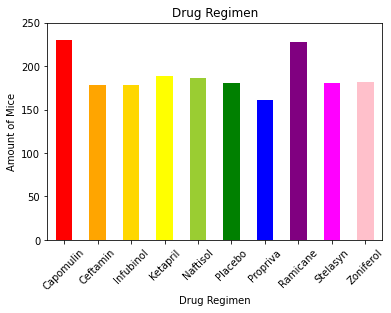

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# count all data points for each drug
count_drug = complete_data.groupby("Drug Regimen")["Drug Regimen"].count()

# differentiate colors for each drug
color_list = ["red", "orange", "gold", "yellow", "yellowgreen", "green", "blue", "purple", "magenta", "pink"]

# create the bar chart and set axes limits
drug_chart = count_drug.plot(kind="bar", color = color_list, rot = 45)
drug_chart.set_xlim([-0.5,9.5])
drug_chart.set_ylim([0,250])

# add labels
drug_chart.set_ylabel("Amount of Mice")
drug_chart.set_title("Drug Regimen")


Text(0.5, 1.0, 'Drug Regimens')

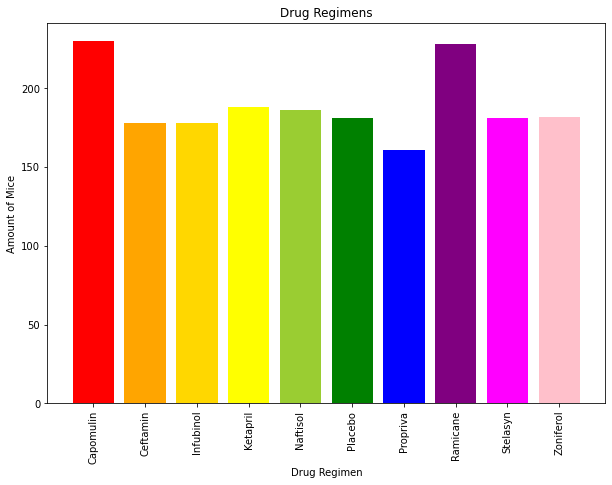

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.figure(figsize = (10,7))
plt.bar(count_drug.index.values, count_drug.values, color = color_list)
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Amount of Mice")
plt.title("Drug Regimens")

<AxesSubplot:ylabel='Sex'>

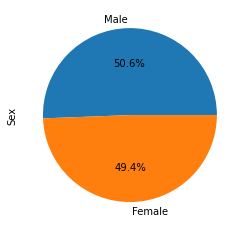

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_sex = complete_data['Sex'].value_counts()

mice_sex.plot(kind = 'pie', autopct = '%1.1f%%')

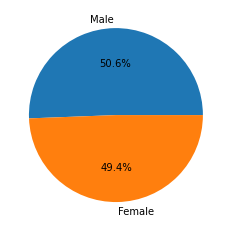

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_sex.values, labels = mice_sex.index.values, autopct='%1.1f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
    # Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = complete_data.groupby('Mouse ID').max()["Timepoint"]
greatest_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = pd.merge(greatest_timepoint, complete_data, on = ['Mouse ID', 'Timepoint'], how = 'left')
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merged_data.loc[merged_data['Drug Regimen']== drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_volume)
    

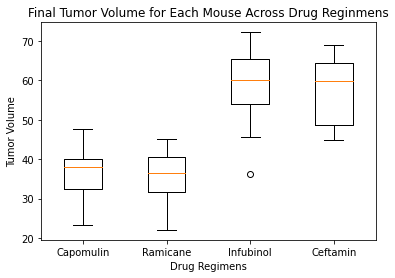

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_vol_data, labels = treatments)
plt.title("Final Tumor Volume for Each Mouse Across Drug Reginmens")
plt.xlabel("Drug Regimens")
plt.ylabel("Tumor Volume")
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Mouse (x401) treated with Capomulin')

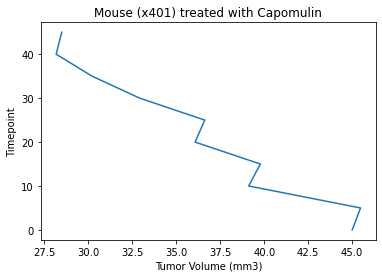

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# pick a mouse treated with Capomulin
a_mouse = complete_data[complete_data["Mouse ID"]=="x401"]

# define x (tumor volume) and y (time point)
x_axis = a_mouse["Tumor Volume (mm3)"]
y_axis = a_mouse["Timepoint"]

# create a line plot and put labels
plt.plot(x_axis,y_axis)
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")
plt.title("Mouse (x401) treated with Capomulin")


Text(0, 0.5, 'Mouse Weight')

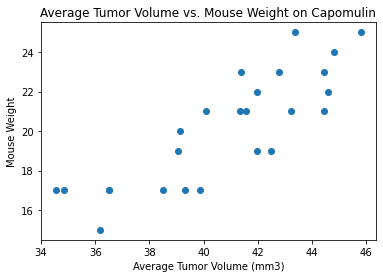

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_regimen = complete_data[complete_data["Drug Regimen"] == "Capomulin"]
avg_tumor_volume= capomulin_regimen.groupby(['Mouse ID']).mean()

weight = avg_tumor_volume["Weight (g)"].min()
avg_volume = avg_tumor_volume["Tumor Volume (mm3)"].mean()

plt.scatter(avg_tumor_volume['Tumor Volume (mm3)'], avg_tumor_volume['Weight (g)'])

# labels

plt.title("Average Tumor Volume vs. Mouse Weight on Capomulin")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Mouse Weight")


## Correlation and Regression

Text(0, 0.5, 'Tumor Volume (mm3)')

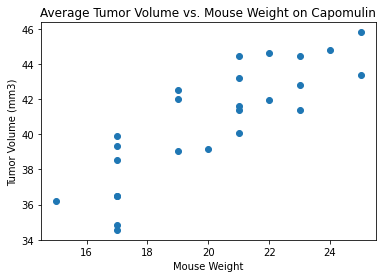

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])

# labels
plt.title("Average Tumor Volume vs. Mouse Weight on Capomulin")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")


In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_tumor_volume ['Weight (g)'], avg_tumor_volume ['Tumor Volume (mm3)'])
regress_values = avg_tumor_volume ['Weight (g)'] * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression line is {line_eq}.")

pearson = round(st.pearsonr(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])[0],3)
print(f"The correlation coefficient is {pearson}.")


The linear regression line is y = 0.95x + 21.55.
The correlation coefficient is 0.842.


Text(0, 0.5, 'Tumor Volume (mm3)')

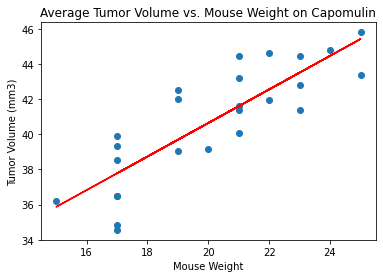

In [23]:
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
plt.plot(avg_tumor_volume ['Weight (g)'],regress_values,"r-")


# labels
plt.title("Average Tumor Volume vs. Mouse Weight on Capomulin")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")